![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 002 - Part IV

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 19/08/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_08/Exercise0002Part004.ipynb)

In [21]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp

# Machine Learning
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

# Computer Vision

# Statistics

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [22]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [23]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=11YqtdWwZSNE-0KxWAf1ZPINi9-ar56Na'
DATA_FILE_NAME  = r'ClusteringData.npy'

TOTAL_RUN_TIME = 15 #<! Don't touch it!

## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Don't use `pip install` on the submitted notebook!  
   If you need a package that is not imported make it clear by a comment.
 - Good Luck!

<font color='red'>Total run time must be **less than `TOTAL_RUN_TIME` seconds**</font>.

In [24]:
# Run Time
print(f'The total run time must not exceed: {TOTAL_RUN_TIME} [Sec]')
startTime = time.time()

The total run time must not exceed: 15 [Sec]


* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

## Team Members
- `Ori_Blanka_208994764`.
 - `Or_Benson_308577345`.
 - `Alon_Hertz_315682773`

In [25]:
# Students Packages to Import
# If you need a package not listed above, use this cell

# Python
from queue import Queue
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

## Generate / Load Data

In [26]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

In [27]:
# Generate / Load Data

numSamples  = 1000
mA          =  np.array([[0.6, -0.6], [-0.4, 0.8]])

mX1 = datasets.make_circles(n_samples = numSamples, noise = 0.02)[0]
mX2 = datasets.make_moons(n_samples = numSamples, noise = 0.05)[0]
mX3 = datasets.make_blobs(n_samples = numSamples, random_state = 170)[0] @ mA
mX4 = datasets.make_blobs(n_samples = numSamples, random_state = 170, cluster_std = [0.8, 2, 0.4])[0] 
mX5 = np.load(DATA_FILE_NAME)

lDataSet = [mX1, mX2, mX3, mX4, mX5]
numDataSets = len(lDataSet)


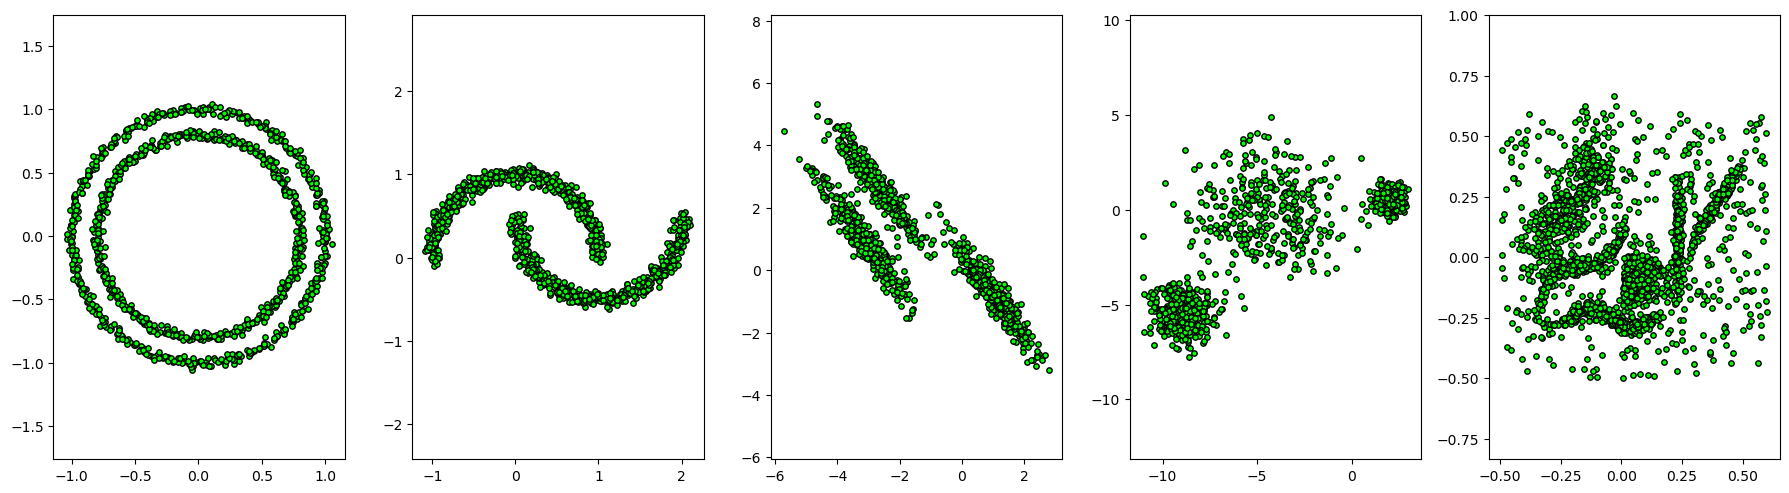

In [28]:
# Plot Data
hF, hAs = plt.subplots(nrows = 1, ncols = numDataSets, figsize = (18, 5))
hAs = hAs.flat

for ii, hA in enumerate(hAs):
    mX = lDataSet[ii]
    hA.scatter(mX[:, 0], mX[:, 1], c = 'lime', s = 15, edgecolor = 'k')
    hA.axis('equal')
    
plt.tight_layout()
plt.show()

## 8. Clustering by Density based Spatial Clustering of Applications with Noise (DBSCAN)

### 8.1. DBSCAN Algorithm

In this section we'll implement the DBSCAN algorithm:

1. Implement an auxiliary function to compute the connected components (`GetConnectedComponents()`).  
   You may choose any implementation strategy (`DFS` / `BFS`, ect...).
2. Implement the function `DBSCAN()`.  
   The function should label noise points as `-1`.

* <font color='brown'>(**#**)</font> Implementation should be efficient (Memory and operations).



In [29]:
#===========================Fill This===========================#
def GetConnectedComponents(mG: np.ndarray) -> np.ndarray:
    '''
    Extract the connected components of a graph.
    Args:
        mG          - Graph matrix.
    Output:
        vL          - Label per component.
    Remarks:
        - This is a !!BFS / DFS!! implementation.
    '''
    # Keep the size of the graph matrix (num of vertices)
    N = np.shape(mG)[0]

    # Initializing a queue to hold the adjacent vertices of the visited vertices
    q = Queue(maxsize = N**2)

    # Initializing a list to hold "visited" indication for each vertix 
    visited_vertices = np.full(N, 0)

    # Initializing a list to hold the componant label for each vertix
    vL = np.full(N, 0)

    # Keep the current componant's label in order to tag each of the vertices
    curr_label = 0

    # Make sure to go over all the vertices
    for ver_idx in range(N):
      # Check weather the current vertix was already visited (handle only if not visited yet)
      if visited_vertices[ver_idx] == 0:
        # Add the current vertix to the queue 
        q.put(ver_idx)
        while (q.empty() == False):
          # Get the next vertix from the queue
          curr_vertix = q.get_nowait()
          # Check weather the current vertix was already visited (handle only if not visited yet)
          if visited_vertices[curr_vertix] == 0:
            # Mark as visited and tag with label
            visited_vertices[curr_vertix] = 1
            vL[curr_vertix] = curr_label

            # Add the adjacents of curr vertix to the queue
            for adj_idx in range(N):
              if (mG[curr_vertix][adj_idx] == 1):
                q.put_nowait(adj_idx)

        # The current componant was completely traversed, therefore promote the label 
        curr_label += 1       

    return vL

#===============================================================#

In [30]:
#===========================Fill This===========================#
def DBSCAN(mX: np.ndarray, Z: int, r: float) -> np.ndarray:
    '''
    DBSCAN Algorithm.
    Args:
        mX  - Input data with shape N x d.
        Z   - Number of points required to be a core point.
        r   - Neighborhood radius.
    Output:
        vL  - The labels (-1, 0, 1, .., K - 1) per sample with shape (N, ).
    Remarks:
        - Clusters will have the labels {0, 1, ..., K - 1}.
        - Noise samples will have the label `-1`.
    '''

    # Pre
    # Keep the size of the data set
    N = np.shape(mX)[0]
    # Initialize array for core points indices
    core_indices = []
    # Calculate the distances between each two points in the data set 
    dist_matrix = sp.spatial.distance_matrix(mX, mX)

    # Step 1: Find core points
    # for each point count the number of neigbors (dist equals to r or below)
    for i in range(N):
      neighbors_counter = 0
      for j in range(N):
        if dist_matrix[i][j] <= r:
          neighbors_counter += 1
      # add the point to the cores list in case it has Z or above neigbors
      if neighbors_counter >= Z:
        core_indices.append(i)

    # Step 2: Build the graph
    num_of_cores = len(core_indices)
    # Initialize matrix for the core graph
    core_graph = np.zeros((num_of_cores, num_of_cores))
    # Build the core graph
    for i, core_idx_1 in enumerate(core_indices):
      for j, core_idx_2 in enumerate(core_indices):
        if dist_matrix[core_idx_1][core_idx_2] <= r:
          core_graph[i][j] = 1

    # Step 3: Find connected components
    core_labels = GetConnectedComponents(core_graph)

    # Step 4: Assign boundary points
    # Mark all the data points as noise
    all_labels = np.full(N, -1, dtype=int)
    # For each point in the data set check if core or boundery point and tag accordingly
    for point_idx in range(N):
      if point_idx in core_indices:
        all_labels[point_idx] = core_labels[core_indices.index(point_idx)]
      else:  
        dist_to_cores = [dist_matrix[point_idx][core_idx] for core_idx in core_indices]
        min_dist_to_core = min(dist_to_cores)
        if min_dist_to_core <= r:
          closest_core_idx = dist_to_cores.index(min_dist_to_core)
          all_labels[point_idx] = core_labels[closest_core_idx]

    return all_labels
#===============================================================#

### 8.2. Clustering the Data Set

In this section we'll use the implementation of the DSCAN algorithm.
The tasks are:

1. Use the data set `mX4`.
2. Tweak the parameters until you have 3 clusters.
3. Display results.

In [31]:
#===========================Fill This===========================#
# 1. Set parameters.
# 2. Apply the algorithm.

Z = 10
r = 1

cluster_labels = DBSCAN(mX4, Z, r)

#===============================================================#


In [32]:
#===========================Fill This===========================#
# 1. Plot the clustered data.
# !! The noise samples should also be labeled.
def plotClusteredData(mX, labels):
  label_color_map = {-1:'white', 0:'red', 1:'blue', 2:'yellow', 3:'black', 4:'green', 5:'purple'}

  label_color = [label_color_map[l] for l in labels]
  ax = plt.scatter(mX[:, 0], mX[:, 1], c = label_color , s = 15, edgecolor = 'k')
  
#===============================================================#

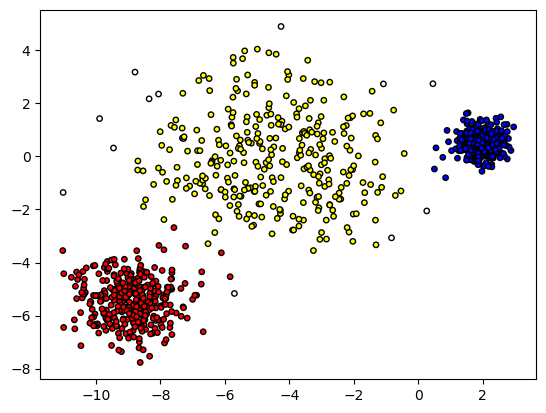

In [33]:
plotClusteredData(mX4, cluster_labels)

### 8.3. An Algorithm to Set the Parameters Automatically Given a Data Set

Can you think about an algorithm to automatically infer optimal parameters of the DBSCAN algorithm given a data set?   

1. Sketch the algorithm (Words / Diagram).
2. Implement and test on `mX4`.
3. Plot the results.

* <font color='brown'>(**#**)</font> Run time should be reasonable (Single number of seconds).
* <font color='brown'>(**#**)</font> Good answers might be given a bonus points of up to 4 points.

### 8.3. Solution

The suggested algorithm:
- for each Z in the range of 5 to 15:
  - find the distances of each point to the Z nearest neighbor
  - sort the points according to the distanse
  - referring to the graph of "distance to the Z-nearest neighbor" as function of point index, pick the "elbow"/"knee" and store the distance as epsilon candidate
- for each Z and epsilon candidates:
  - run DBSCAN using these parameters
  - calculate siluhouette score as quality measure of the clustering structure 
- pick the configuration which resulted the best clustering structure (maximal siluhouette score)

---

In [34]:
#===========================Fill This===========================#
# Implement a function which gets a data set and output the `Z` and `r` parameters of `DBSCAN()`.
def findOptimalDbscanParams(mX: np.ndarray) -> Tuple[int, float]:
    '''
    Extract the connected components of a graph.
    Args:
        mX         - Data matrix.
    Output:
        Z          - Optimal value for minPts given mX.
        R          - Optimal value for epsilon given mX.
    '''
    # define the range for Z
    min_z = 5
    max_z = 15
    nZ = max_z - min_z + 1

    # Keep the size of the data set
    N = np.shape(mX)[0]

    # Use NearestNeighbors to calculate effectively the distances from each point to its neighbors
    nn = NearestNeighbors(n_neighbors=max_z).fit(mX)
    distances, indices = nn.kneighbors(mX)
    # Sort the columns (distances to the z-nearest neighbor for each z)
    distances = np.sort(distances, axis=0)

    # Initialize empty array for epsilon parameter candidates
    eps_candidates = np.ndarray(nZ)
    # Initialize array of -1's for siluhouette scores (-1 as lowest val)
    siluhouette_scores = np.full(nZ, -1, dtype=float)
    plt.figure(figsize=(7,7))
    plt.xlabel("Data Points Sorted Indices")
    plt.ylabel("Distance to the z-nearest neighbor")

    # For each tested value for z (minPts)  
    for i in range(nZ):
      z = range(min_z, max_z+1)[i]
      # Fetch the sorted distances of each data point to its z nearest neighbor
      distances_to_z_nn = distances[:,z-1]
      distances_to_z_nn = sp.signal.savgol_filter(distances_to_z_nn, window_length=21, polyorder=2)  # Smoothing
 # order of fitted polynomial
      # Plot the distances curve and pick the "knee" as new epsilon condidate
      plt.plot(distances_to_z_nn, label=f"Z = {z}")
      kn = KneeLocator(range(N), distances_to_z_nn, curve='convex', direction='increasing')
      eps = distances_to_z_nn[kn.knee]
      eps_candidates[i] = eps
      # Run DBSCAN on the original data set using z and eps (current candidates)
      data_clusters = DBSCAN(mX, z, eps)

      # Compute Silhouette Score if more than one cluster was found (recall -1 for noise is included in the data clusters list)
      if len(np.unique(data_clusters)) > 2:
        siluhouette_scores[i] = metrics.silhouette_score(mX, data_clusters)

    # Find and return the candidates which resulted the best score
    best_idx = np.argmax(siluhouette_scores)
    best_z = min_z + best_idx
    best_eps = eps_candidates[best_idx]

    plt.legend()
    plt.show()
    return best_z, best_eps

#===============================================================#


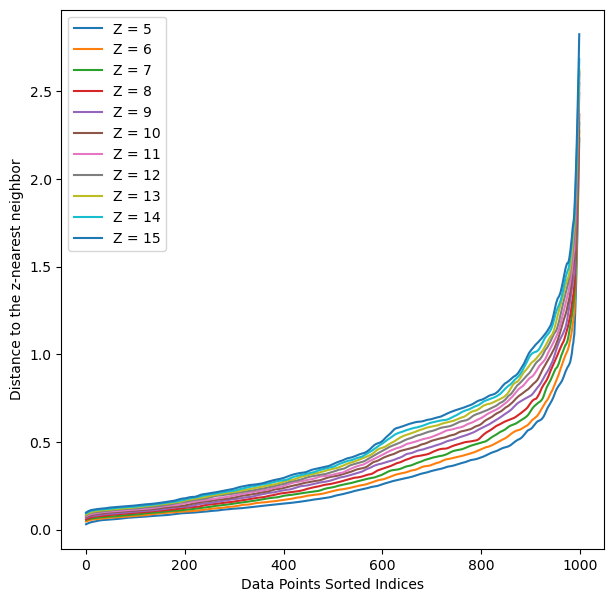

opt_Z = 14, opt_epsilon = 1.020439973543171


In [35]:
#===========================Fill This===========================#
# Test your algorithm on `mX4` data set. Show results.
opt_Z, opt_epsilon = findOptimalDbscanParams(mX4)
print(f"opt_Z = {opt_Z}, opt_epsilon = {opt_epsilon}")

#===============================================================#

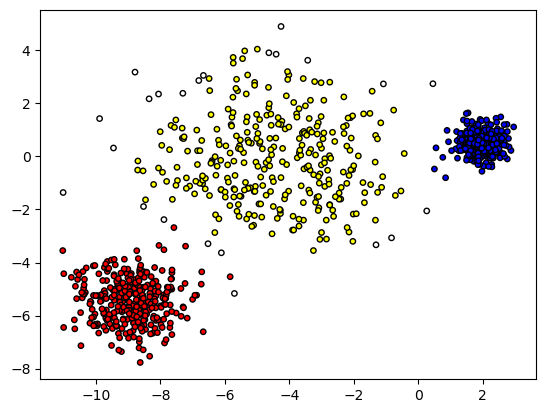

In [36]:
opt_cluster_labels = DBSCAN(mX4, opt_Z, opt_epsilon)

plotClusteredData(mX4, opt_cluster_labels)

### 8.4. Test Methods on the Data Set

In this section we'll compare 4 methods on each data set.  
The 4th methods is `AgglomerativeClustering` which is imported from `SciKit Learn`.

1. Run each method on each data set.
2. Plot a grid of results (Using `plt.subplots()`): Each row is a different method, each column is a different data set.
3. Find a reasonable value for the hyper parameters per data set per method.

The final result is a grid of `4 x 5` scatter plots.

* <font color='brown'>(**#**)</font> You should use `CourseAuxFun.py` and import your self implemented functions from the module.

In [37]:
#===========================Fill This===========================#
# Display the results of each method
def plotClusteredDataPerMethod(dataSets, labelsPerMethod):
  label_color_map = {-1:'white', 0:'red', 1:'blue', 2:'yellow', 3:'black', 4:'green', 5:'purple'}
  clusteringMethods = ["K-means", "GMM", "DBSCAN", "Aglomerative"]
  dataSetsNames = ["mX1", "mX2", "mX3", "mX4", "mX5"]

  fig, axs = plt.subplots(nrows = np.shape(labelsPerMethod)[0], ncols = len(dataSets), figsize = (18, 18))

  for i, labels in enumerate(labelsPerMethod):
    for j, dataSet in enumerate(dataSets):
      labels_color = [label_color_map[l] for l in labels[j]]
      axs[i][j].scatter(dataSet[:, 0], dataSet[:, 1], c = labels_color , s = 15, edgecolor = 'k')
      axs[i][j].axis('equal')

  for i, ax in enumerate(axs[0]):
      ax.set_title(dataSetsNames[i], fontweight="bold")

  for i, ax in enumerate(axs[:,0]):
      ax.set_ylabel(clusteringMethods[i], rotation=0, fontweight="bold")

  # plt.tight_layout()
  plt.show()
#===============================================================#

In [41]:
%run CourseAuxFun.py

#===========================Fill This===========================#
# Display the results of each method

labelsPerMethod = [[],  # K-means
                   [],  # GMM
                   [],  # DBSCAN
                   []]  # Aglomerative
              
# optimized parameters
vK = [2, 2, 3, 3, 5]
vZ = [5, 5, 10, 10, 22]
vR = [0.1, 0.1, 0.4, 1, 0.04]
vLink = ['single', 'single', 'ward', 'ward', 'ward'] 

for dateSetIdx, dataSet in enumerate(lDataSet):
  k = vK[dateSetIdx]
  z = vZ[dateSetIdx]
  r = vR[dateSetIdx]
  linkage =  vLink[dateSetIdx]

  i = 0
  # K-means
  print(f"Calculating K-means on data set #{dateSetIdx}")
  mC = InitKMeans(dataSet, k, initMethod=1, seedNum=seedNum)
  mC, vL_kmeans, lO_kmeans = KMeans(dataSet, mC, numIter=100, stopThr=0)
  labelsPerMethod[i].append(vL_kmeans)

  i += 1
  # GMM
  print(f"Calculating GMM on data set #{dateSetIdx}")
  mμ, tΣ, vW = InitGmm(dataSet, k, seedNum=seedNum)
  mμ, tΣ, vW, vL_GMM, lO_GMM = GMM(dataSet, mμ, tΣ, vW, numIter=30, stopThr=0)
  labelsPerMethod[i].append(vL_GMM)

  i += 1
  # DBSCAN
  print(f"Calculating DBSCAN on data set #{dateSetIdx}")
  labelsPerMethod[i].append(DBSCAN(dataSet, z, r))
  
  i += 1
  # Aglomerative  
  print(f"Calculating aglomerative clustering on data set #{dateSetIdx}")
  agg_clustering = AgglomerativeClustering(k, linkage=linkage).fit(dataSet)
  labelsPerMethod[i].append(agg_clustering.labels_)

#===============================================================#

Calculating K-means on data set #0
Calculating GMM on data set #0
Calculating DBSCAN on data set #0
Calculating aglomerative clustering on data set #0
Calculating K-means on data set #1
Calculating GMM on data set #1
Calculating DBSCAN on data set #1
Calculating aglomerative clustering on data set #1
Calculating K-means on data set #2
Calculating GMM on data set #2
Calculating DBSCAN on data set #2
Calculating aglomerative clustering on data set #2
Calculating K-means on data set #3
Calculating GMM on data set #3
Calculating DBSCAN on data set #3
Calculating aglomerative clustering on data set #3
Calculating K-means on data set #4
Calculating GMM on data set #4
Calculating DBSCAN on data set #4
Calculating aglomerative clustering on data set #4


c:\Users\Ori\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


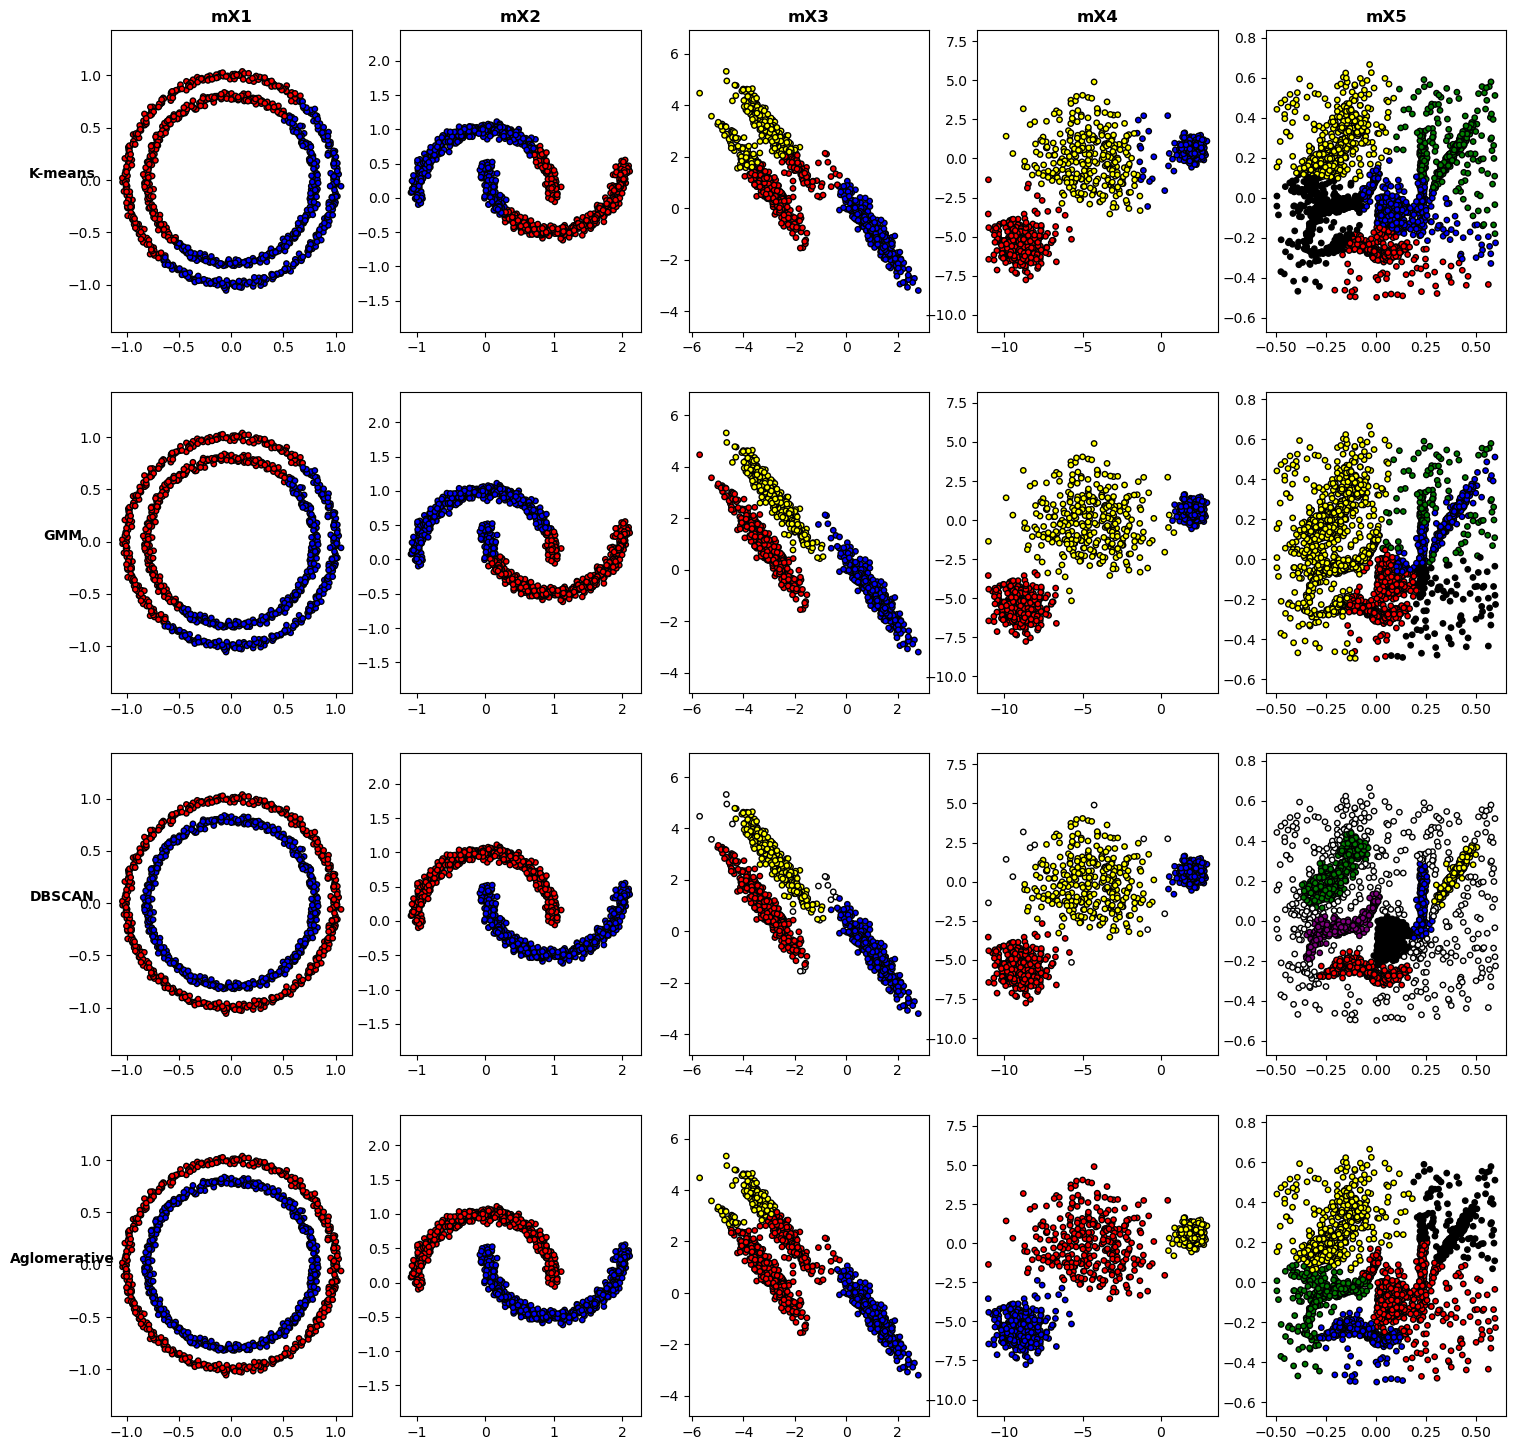

In [42]:
plotClusteredDataPerMethod(lDataSet, labelsPerMethod)

In [40]:
# Run Time
# Check Total Run Time.
# Don't change this!

endTime = time.time()

totalRunTime = endTime - startTime
print(f'Total Run Time: {totalRunTime} [Sec].')

if (totalRunTime > TOTAL_RUN_TIME):
    raise ValueError(f'You have exceeded the allowed run time as {totalRunTime} > {TOTAL_RUN_TIME}')

Total Run Time: 9.921311855316162 [Sec].
